In [1]:
%load_ext autoreload
%autoreload 2
from antarctic_plots import fetch, maps, utils

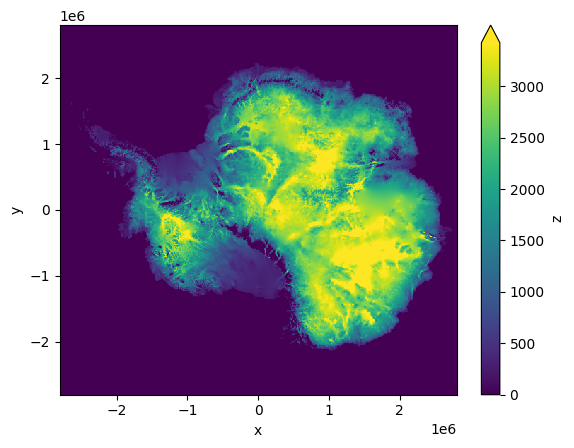

In [2]:
# download and plot BedMachine thickness data
grid = fetch.bedmachine(
    layer="thickness",
    plot=True,
)

In [3]:
# get info on Bedmachine surface data
grid = fetch.bedmachine(
    layer="surface",
    info=True,
)

: Title: 
: Command: 
: Remark: 
: Gridline node registration used [Cartesian grid]
: Grid file format: nf = GMT netCDF format (32-bit float), CF-1.7
: x_min: -2800000 x_max: 2800000 x_inc: 10000 name: x n_columns: 561
: y_min: -2800000 y_max: 2800000 y_inc: 10000 name: y n_rows: 561
: v_min: 0 v_max: 4048.59643555 name: z
: scale_factor: 1 add_offset: 0
: format: classic
: Default CPT: 



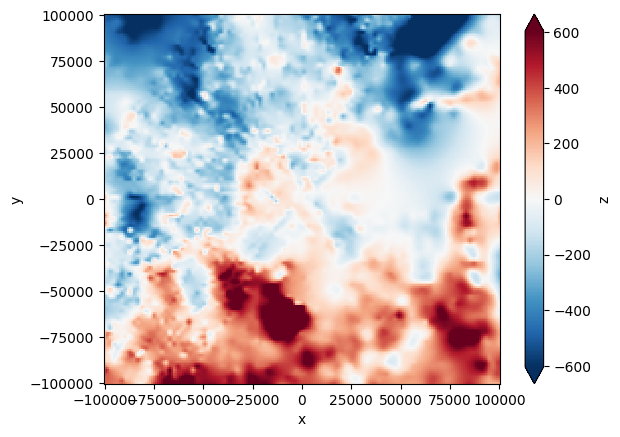

In [4]:
# fetch specific region and specify grid spacing
grid = fetch.bedmachine(
    layer="bed",
    region=(-100e3, 100e3, -100e3, 100e3),
    spacing=1e3,
    plot=True,
)

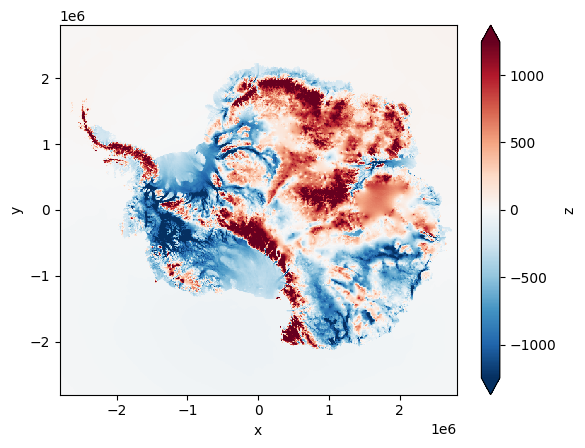

In [5]:
# get pre-calculated ice base, and convert from geoid to ellipsoid reference
grid = fetch.bedmachine(
    layer="icebase",
    reference="ellipsoid",
    plot=True,
)